In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import norm

In [29]:
mu = 1000
mean = 950
sigma = 40
n = 40

In [31]:
z = (mean-mu)/(sigma/np.sqrt(n))
z

-7.905694150420949

In [47]:
lower = norm.ppf(0.05,loc=mu, scale=sigma )
upper = norm.ppf(0.95,loc=mu, scale=sigma )

In [51]:
lower2 = norm.ppf(0.025,loc=mu, scale=sigma )
upper2 = norm.ppf(0.975,loc=mu, scale=sigma )

In [48]:
norm.cdf( mean, loc=mu, scale=sigma )

0.10564977366685535

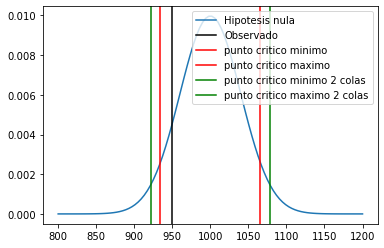

In [54]:
x = np.linspace(800,1200,100)
plt.plot( x, norm.pdf( x, loc=mu, scale=sigma ), label='Hipotesis nula' )
#plt.plot( x, norm.pdf( x, loc=mean, scale=sigma ) )
plt.axvline(x=mean,color='k',label='Observado')
plt.axvline(x=lower,color='r',label='punto critico minimo')
plt.axvline(x=upper,color='r',label='punto critico maximo')

plt.axvline(x=lower2,color='g',label='punto critico minimo 2 colas')
plt.axvline(x=upper2,color='g',label='punto critico maximo 2 colas')

#plt.yscale('log')
plt.legend(loc=1)

# Bondad de ajuste

In [56]:
fo = np.zeros((3,3))
fo

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [59]:
fo[0,0] = 38
fo[0,1] = 55
fo[0,2] = 52
fo[1,0] = 39
fo[1,1] = 65
fo[1,2] = 55
fo[2,0] = 43
fo[2,1] = 60
fo[2,2] = 63

In [60]:
fo

array([[38., 55., 52.],
       [39., 65., 55.],
       [43., 60., 63.]])

In [61]:
N = np.sum(fo)
print(N)

470.0


In [72]:
# Calcular marginales
g = np.sum( fo, axis=0 ) # sumar filas
h = np.sum( fo, axis=1) # sumar columnas

In [69]:
# Calcular probabilidades "Observadas"

In [74]:
g /= N
h /= N

In [75]:
g

array([0.25531915, 0.38297872, 0.36170213])

In [76]:
h

array([0.30851064, 0.33829787, 0.35319149])

In [77]:
po = np.zeros_like(fo)
po

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [78]:
for i in range(3):
    for j in range(3):
        po[i,j] = h[i]*g[j]  # Las variables son independientes Ho

In [79]:
po

array([[0.07876867, 0.11815301, 0.11158895],
       [0.08637392, 0.12956089, 0.12236306],
       [0.09017655, 0.13526483, 0.12775011]])

In [80]:
# Frecuencias esperadas

In [81]:
fe = po*N
fe

array([[37.0212766 , 55.53191489, 52.44680851],
       [40.59574468, 60.89361702, 57.5106383 ],
       [42.38297872, 63.57446809, 60.04255319]])

In [82]:
fo

array([[38., 55., 52.],
       [39., 65., 55.],
       [43., 60., 63.]])

In [84]:
def GetChi2(fo,fe):
    
    diff = fo - fe
    
    m = diff**2/fe
    
    return np.sum(m)

In [86]:
Chi2 = GetChi2(fo,fe)
Chi2

0.8396477840721925

In [88]:
df = 4

In [94]:
x = np.linspace(0,20,100)
y = chi2.pdf(x, df=df)

In [98]:
valorcritico = chi2.ppf( 0.95, df=df)
valorcritico

9.487729036781154

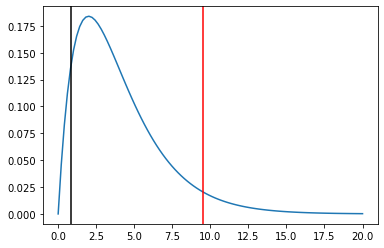

In [100]:
plt.plot(x,y)
plt.axvline(x = valorcritico, color='r',label='Valor critico')
plt.axvline(x = Chi2, color='k', label='Valor observado')

In [103]:
p_value = 1- chi2.cdf( Chi2, df=df )
print(p_value)

0.9330550769215176


In [105]:
df = pd.read_csv('../Data/Sesion7/Binomial.csv')

In [106]:
df

,NCaras,ObsFreq
0,0,38
1,1,143
2,2,343
3,3,285
4,4,166
5,5,25


In [107]:
NCaras = df.NCaras
ObsFreq = df.ObsFreq

In [110]:
N = np.sum(ObsFreq)
print(N)

1000


In [113]:
p = np.sum( NCaras*ObsFreq )/(N*5) #Es el promedio por moneda
p

0.4946

$$ \chi_{0.05, k-t-1}^{2} $$

k es el número de datos menos 1
t es el número de parámetros que se estimaron 

In [114]:
# Suponemos que H0 es verdades, calculamos la frecuencia esperada
P = binom.pmf( NCaras, 5, p )
P

array([0.03297435, 0.16134855, 0.31580132, 0.30905289, 0.15122434,
       0.02959856])

In [115]:
ExpFreq = P*N
ExpFreq

array([ 32.97434579, 161.34854994, 315.80131698, 309.05289153,
       151.22433731,  29.59855846])

In [126]:
Chi2 = GetChi2(ObsFreq,ExpFreq)
Chi2

9.225191880421796

In [127]:
chi2_critico = chi2.ppf(0.95,df=4)
chi2_critico

9.487729036781154

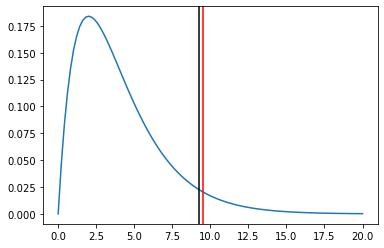

In [128]:
plt.plot(x,y)
plt.axvline(x = chi2_critico, color='r',label='Valor critico')
plt.axvline(x = Chi2, color='k', label='Valor observado')

In [123]:
bins = np.arange(0,7,1)
H1,bines = np.histogram(ObsFreq,bins=bins)
H2,bines = np.histogram(ExpFreq,bins=bins)

<BarContainer object of 6 artists>

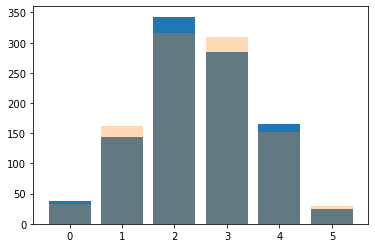

In [125]:
plt.bar(bines[:-1],ObsFreq)
plt.bar(bines[:-1],ExpFreq,alpha=0.3)